In [1]:
!pip install gluoncv

     |████████████████████████████████| 512kB 9.4MB/s 


In [2]:
!pip install mxnet

     |████████████████████████████████| 25.4MB 1.2MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
import time
import numpy as np
import mxnet as mx
from mxnet import gluon, autograd
from mxnet.gluon.data.vision import transforms
from gluoncv import data, utils, model_zoo
from gluoncv.utils.parallel import *
from gluoncv.loss import MixSoftmaxCrossEntropyLoss
from matplotlib import pyplot as plt

In [4]:
from google.colab import files
files.upload() 

Saving pascal_voc.py to pascal_voc.py


{'pascal_voc.py': b'"""Prepare PASCAL VOC datasets"""\nimport os\nimport shutil\nimport argparse\nimport tarfile\nfrom gluoncv.utils import download, makedirs\n\n_TARGET_DIR = os.path.expanduser(\'~/.mxnet/datasets/voc\')\n\n\ndef parse_args():\n    parser = argparse.ArgumentParser(\n        description=\'Initialize PASCAL VOC dataset.\',\n        epilog=\'Example: python pascal_voc.py --download-dir ~/VOCdevkit\',\n        formatter_class=argparse.ArgumentDefaultsHelpFormatter)\n    parser.add_argument(\'--download-dir\', type=str, default=\'~/VOCdevkit/\', help=\'dataset directory on disk\')\n    parser.add_argument(\'--no-download\', action=\'store_true\', help=\'disable automatic download if set\')\n    parser.add_argument(\'--overwrite\', action=\'store_true\', help=\'overwrite downloaded files if set, in case they are corrupted\')\n    args = parser.parse_args()\n    return args\n\n#####################################################################################\n# Download a

In [5]:
!python pascal_voc.py

100% 449250/449250 [00:05<00:00, 77035.30KB/s]
100% 440450/440450 [00:05<00:00, 77327.78KB/s]
100% 1952773/1952773 [00:25<00:00, 77094.13KB/s]
1386270KB [01:12, 19190.67KB/s]                 


In [6]:
# input_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.485, .456, .406], [.229, .224, .225]),])
trainset = data.VOCSegmentation(split='train')  # (list of list)
print('Training images:', len(trainset))

Training images: 2913


In [0]:
import gluoncv
from PIL import Image
import numpy as np
from gluoncv import data, utils
from matplotlib import pyplot as plt

img, mask = trainset[1]
# get pallete for the mask
from gluoncv.utils.viz import get_color_pallete
mask = get_color_pallete(mask.asnumpy())
mask.save('mask.png')

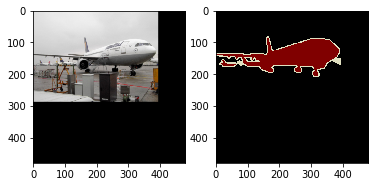

In [8]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# subplot 1 for img
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img.asnumpy().reshape(480, 480, 3).astype('uint8'))
# subplot 2 for the mask
mmask = mpimg.imread('mask.png')
fig.add_subplot(1,2,2)
plt.imshow(mmask)
# display
plt.show()

In [0]:
batch_size = 1 
train_data = gluon.data.DataLoader(trainset, batch_size, shuffle=False, last_batch='rollover', num_workers=batch_size)

In [10]:
import gluoncv
from PIL import Image
import numpy as np
from gluoncv import data, utils
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical

for batch, (data, target) in enumerate(train_data):
    matrix_data = data.asnumpy()  # (batch, 480, 480, 3)
    matrix_target = target.asnumpy().astype(int)  # (batch, 480, 480)
    matrix_target[matrix_target == -1] = 21  # -1 represents for the unlabled class 
    categorical_labels = to_categorical(matrix_target, num_classes=22) 
    print(categorical_labels.shape)
    print(matrix_data.shape)
    print(matrix_target.shape) 
    # gluoncv.utils.viz.plot_image(matrix_data[0])
    # plt.show()
    break

Using TensorFlow backend.


(1, 480, 480, 22)
(1, 480, 480, 3)
(1, 480, 480)
